In [503]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [504]:
data = pd.read_csv("water_preprocessed.csv")
data.columns

Index(['Unnamed: 0', 'STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'DO', 'PH',
       'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'year', 'WQI',
       'WQI clf'],
      dtype='object')

In [505]:
df = data.groupby("STATE")['WQI'].mean()


In [506]:
df

STATE
Andhra Pradesh             68.798008
Chandigarh                586.763415
Dadara & Nagar Havelli    154.240995
Daman & Diu                82.846607
Goa                        92.914381
Gujarat                   284.554858
Haryana                   202.915881
Himachal Pradesh          138.237016
Karnataka                  62.571553
Kerala                     66.364390
Madhya Pradesh             62.530584
Maharashtra                96.915489
Manipur                    78.622934
Meghalaya                 109.738380
Mizoram                    57.567311
Odisha                    188.872878
Puducherry                 80.225370
Punjab                    597.769544
Rajasthan                  71.836515
Tamil Nadu                 60.392239
Tripura                    86.744752
Name: WQI, dtype: float64

<AxesSubplot:title={'center':'Mean Water Quality Index over the years'}, ylabel='STATE'>

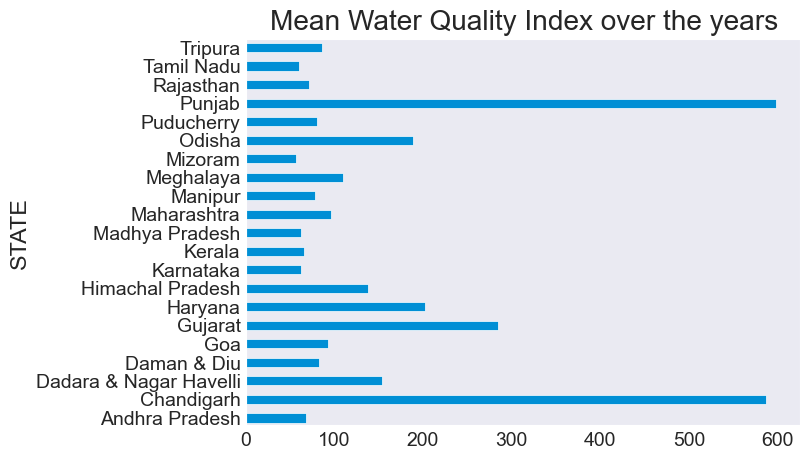

In [507]:
sns.set_style("dark")
# plt.style.use('fivethirtyeight') 

df.plot(kind = 'barh', title = "Mean Water Quality Index over the years")

In [508]:
# input = location/state / year

In [509]:
df = data.groupby("STATE")['WQI'].mean()

<AxesSubplot:title={'center':'Mean Water Quality Index over the years'}, ylabel='STATE'>

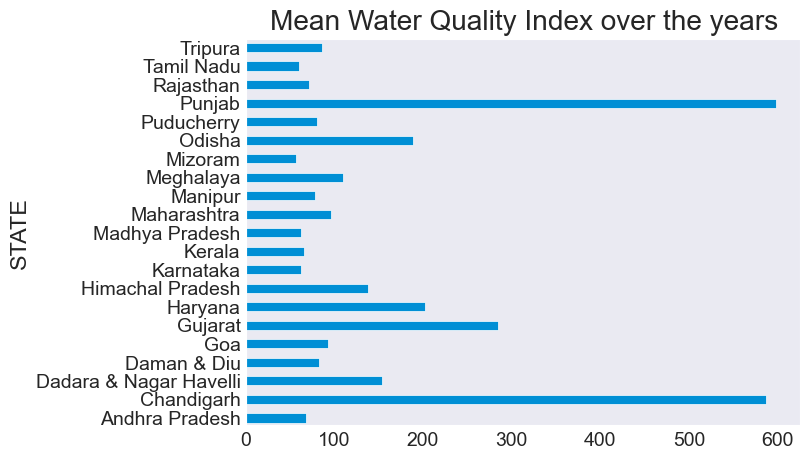

In [510]:
sns.set_style("dark")
# plt.style.use('fivethirtyeight') 

df.plot(kind = 'barh', title = "Mean Water Quality Index over the years")

<AxesSubplot:title={'center':'Mean Water Quality Index over the years'}, ylabel='STATE'>

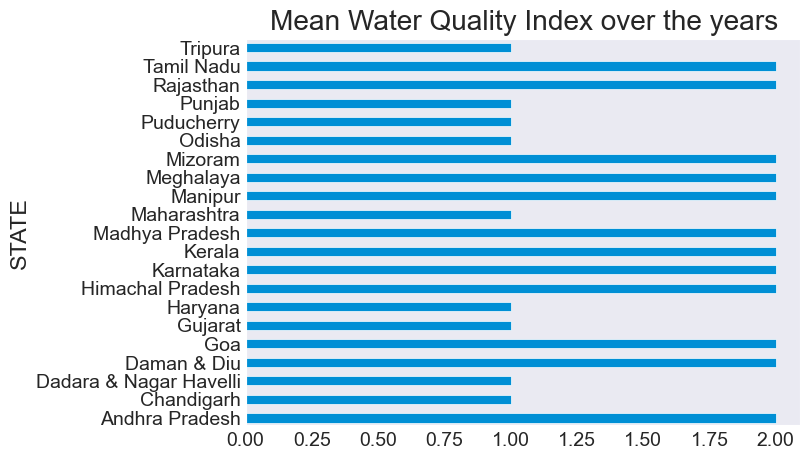

In [511]:
df = data.groupby("STATE")['WQI clf'].median()

sns.set_style("dark")
# plt.style.use('fivethirtyeight') 

df.plot(kind = 'barh', title = "Mean Water Quality Index over the years")

In [512]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [513]:
# Classification

df = data.groupby(["STATE", "year"])['WQI clf'].median().reset_index()
df

,STATE,year,WQI clf
0,Andhra Pradesh,2005.0,1.0
1,Andhra Pradesh,2006.0,1.0
2,Andhra Pradesh,2007.0,1.0
3,Andhra Pradesh,2008.0,2.0
4,Andhra Pradesh,2009.0,2.0
...,...,...,...
175,Tripura,2010.0,1.0
176,Tripura,2011.0,1.0
177,Tripura,2012.0,1.0
178,Tripura,2013.0,1.0


In [514]:
df['WQI clf'].unique()

array([1. , 2. , 3. , 1.5, 2.5])

In [515]:
state_replace = dict()
i = 1
for s in df['STATE'].unique():
    state_replace[s] = i
    i += 1

for i in state_replace:
    # print(i)
    df['STATE'] = df['STATE'].replace([i], state_replace[i])
# ye = df['year'].unique()
# for i in ye:
#     df['year'] = df['year'].replace([i], i - 2000)

df['WQI clf'] = df['WQI clf'] * 2

df['WQI clf'] = df['WQI clf'].astype(float).astype(int)
df

,STATE,year,WQI clf
0,1,2005.0,2
1,1,2006.0,2
2,1,2007.0,2
3,1,2008.0,4
4,1,2009.0,4
...,...,...,...
175,21,2010.0,2
176,21,2011.0,2
177,21,2012.0,2
178,21,2013.0,2


In [516]:
y = df['WQI clf']
x = df[['STATE', 'year']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)

In [517]:
from sklearn.ensemble import GradientBoostingClassifier

reg = GradientBoostingClassifier(min_samples_split=5, min_impurity_decrease=0.1)
reg.fit(x_train,y_train)
predicted_values = reg.predict(x_test)
print("Accuracy =", accuracy_score(y_test, predicted_values))

Accuracy = 0.8333333333333334


In [518]:
#       WQI Range                   Classification

#      Less than 25                  Excellent(3)
#         26–50                         Good(2)
#         51-75                         Poor(1)
#     Greater than 75                 Very Poor(0)

## Everything * 2

In [519]:
print(predicted_values / 2)

[2. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2.
 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1.]
